In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing the excel file

data = pd.read_excel('Data_ WHO Coronavirus Covid-19 Cases and Deaths - WHO-COVID-19-global-data.xlsx')
data

,OBJECTID,ISO_CODE,COUNTRY_NAME,Date_epicrv,NewCase,TotalCase,NewDeath,TotalDeath
0,1,AFG,Afghanistan,2020-02-24T00:00:00.000Z,1,1,0,0
1,2,AFG,Afghanistan,2020-02-25T00:00:00.000Z,0,1,0,0
2,3,AFG,Afghanistan,2020-02-26T00:00:00.000Z,0,1,0,0
3,4,AFG,Afghanistan,2020-02-27T00:00:00.000Z,0,1,0,0
4,5,AFG,Afghanistan,2020-02-28T00:00:00.000Z,0,1,0,0
...,...,...,...,...,...,...,...,...
10528,10529,ZWE,Zimbabwe,2020-04-19T00:00:00.000Z,1,25,0,3
10529,10530,ZWE,Zimbabwe,2020-04-20T00:00:00.000Z,0,25,0,3
10530,10531,ZWE,Zimbabwe,2020-04-21T00:00:00.000Z,0,25,0,3
10531,10532,ZWE,Zimbabwe,2020-04-22T00:00:00.000Z,3,28,0,3


In [3]:
#Making a copy of the original data

covid_data = data.copy()
covid_data

,OBJECTID,ISO_CODE,COUNTRY_NAME,Date_epicrv,NewCase,TotalCase,NewDeath,TotalDeath
0,1,AFG,Afghanistan,2020-02-24T00:00:00.000Z,1,1,0,0
1,2,AFG,Afghanistan,2020-02-25T00:00:00.000Z,0,1,0,0
2,3,AFG,Afghanistan,2020-02-26T00:00:00.000Z,0,1,0,0
3,4,AFG,Afghanistan,2020-02-27T00:00:00.000Z,0,1,0,0
4,5,AFG,Afghanistan,2020-02-28T00:00:00.000Z,0,1,0,0
...,...,...,...,...,...,...,...,...
10528,10529,ZWE,Zimbabwe,2020-04-19T00:00:00.000Z,1,25,0,3
10529,10530,ZWE,Zimbabwe,2020-04-20T00:00:00.000Z,0,25,0,3
10530,10531,ZWE,Zimbabwe,2020-04-21T00:00:00.000Z,0,25,0,3
10531,10532,ZWE,Zimbabwe,2020-04-22T00:00:00.000Z,3,28,0,3


In [4]:
#Summary of covid_data for year 2020. (uncleaned data)

covid_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
OBJECTID,10533.0,5267.000000,3040.759527,1.0,2634.0,5267.0,7900.0,10533.0
NewCase,10533.0,238.315485,1575.758172,0.0,0.0,3.0,36.0,35386.0
TotalCase,10533.0,4615.165480,29104.982315,1.0,8.0,61.0,609.0,800926.0
NewDeath,10533.0,16.352511,112.318269,0.0,0.0,0.0,1.0,2471.0
TotalDeath,10533.0,270.043577,1864.844719,0.0,0.0,1.0,9.0,40073.0


In [5]:
from datetime import datetime

In [6]:
#Converting 'Date_epicrv' data type to Timestamp using datetime module.
#Stored in a variable called date_conv (date conversion).
date_conv = pd.to_datetime(covid_data['Date_epicrv'])
date_conv

0       2020-02-24 00:00:00+00:00
1       2020-02-25 00:00:00+00:00
2       2020-02-26 00:00:00+00:00
3       2020-02-27 00:00:00+00:00
4       2020-02-28 00:00:00+00:00
                   ...           
10528   2020-04-19 00:00:00+00:00
10529   2020-04-20 00:00:00+00:00
10530   2020-04-21 00:00:00+00:00
10531   2020-04-22 00:00:00+00:00
10532   2020-04-23 00:00:00+00:00
Name: Date_epicrv, Length: 10533, dtype: datetime64[ns, UTC]

In [7]:
#Add new column called Date in covid_data.
#Extract date from date_conv.

covid_data['Date']= date_conv.dt.date
covid_data

,OBJECTID,ISO_CODE,COUNTRY_NAME,Date_epicrv,NewCase,TotalCase,NewDeath,TotalDeath,Date
0,1,AFG,Afghanistan,2020-02-24T00:00:00.000Z,1,1,0,0,2020-02-24
1,2,AFG,Afghanistan,2020-02-25T00:00:00.000Z,0,1,0,0,2020-02-25
2,3,AFG,Afghanistan,2020-02-26T00:00:00.000Z,0,1,0,0,2020-02-26
3,4,AFG,Afghanistan,2020-02-27T00:00:00.000Z,0,1,0,0,2020-02-27
4,5,AFG,Afghanistan,2020-02-28T00:00:00.000Z,0,1,0,0,2020-02-28
...,...,...,...,...,...,...,...,...,...
10528,10529,ZWE,Zimbabwe,2020-04-19T00:00:00.000Z,1,25,0,3,2020-04-19
10529,10530,ZWE,Zimbabwe,2020-04-20T00:00:00.000Z,0,25,0,3,2020-04-20
10530,10531,ZWE,Zimbabwe,2020-04-21T00:00:00.000Z,0,25,0,3,2020-04-21
10531,10532,ZWE,Zimbabwe,2020-04-22T00:00:00.000Z,3,28,0,3,2020-04-22


In [8]:
# Drop the existing Date_epicrv column in our covid_data.

covid_data = covid_data.drop(columns=['Date_epicrv','OBJECTID'],axis=1)
covid_data

,ISO_CODE,COUNTRY_NAME,NewCase,TotalCase,NewDeath,TotalDeath,Date
0,AFG,Afghanistan,1,1,0,0,2020-02-24
1,AFG,Afghanistan,0,1,0,0,2020-02-25
2,AFG,Afghanistan,0,1,0,0,2020-02-26
3,AFG,Afghanistan,0,1,0,0,2020-02-27
4,AFG,Afghanistan,0,1,0,0,2020-02-28
...,...,...,...,...,...,...,...
10528,ZWE,Zimbabwe,1,25,0,3,2020-04-19
10529,ZWE,Zimbabwe,0,25,0,3,2020-04-20
10530,ZWE,Zimbabwe,0,25,0,3,2020-04-21
10531,ZWE,Zimbabwe,3,28,0,3,2020-04-22


In [9]:
covid_data = covid_data.set_index('Date')      #setting Date as the new index for this covid_data
covid_data

,ISO_CODE,COUNTRY_NAME,NewCase,TotalCase,NewDeath,TotalDeath
Date,,,,,,
2020-02-24,AFG,Afghanistan,1,1,0,0
2020-02-25,AFG,Afghanistan,0,1,0,0
2020-02-26,AFG,Afghanistan,0,1,0,0
2020-02-27,AFG,Afghanistan,0,1,0,0
2020-02-28,AFG,Afghanistan,0,1,0,0
...,...,...,...,...,...,...
2020-04-19,ZWE,Zimbabwe,1,25,0,3
2020-04-20,ZWE,Zimbabwe,0,25,0,3
2020-04-21,ZWE,Zimbabwe,0,25,0,3


In [10]:
#unique number of countries this data is collected from.

covid_data['COUNTRY_NAME'].nunique()

213

In [11]:
#Checking for missing data 
# => 79 entries of missing data in ISO_CODE
# => 10454 entries with no missing data.

covid_data.isnull().value_counts()

ISO_CODE  COUNTRY_NAME  NewCase  TotalCase  NewDeath  TotalDeath
False     False         False    False      False     False         10454
True      False         False    False      False     False            79
dtype: int64

In [12]:
#Check the country with no ISO_CODE.

covid_data[covid_data['ISO_CODE'].isnull()]

,ISO_CODE,COUNTRY_NAME,NewCase,TotalCase,NewDeath,TotalDeath
Date,,,,,,
2020-02-05,NaN,International conveyance (Diamond Princess),10,10,0,0
2020-02-06,NaN,International conveyance (Diamond Princess),10,20,0,0
2020-02-07,NaN,International conveyance (Diamond Princess),41,61,0,0
2020-02-08,NaN,International conveyance (Diamond Princess),3,64,0,0
2020-02-09,NaN,International conveyance (Diamond Princess),6,70,0,0
...,...,...,...,...,...,...
2020-04-19,NaN,International conveyance (Diamond Princess),0,712,0,13
2020-04-20,NaN,International conveyance (Diamond Princess),0,712,0,13
2020-04-21,NaN,International conveyance (Diamond Princess),0,712,0,13


In [13]:
#Fill the missing ISO_CODE for the above country with ICY (International conveyance).

covid_data['ISO_CODE'].fillna('ICY', inplace=True)

In [14]:
#check if country with ICY as ISO_CODE exists.

covid_data[covid_data['ISO_CODE']=='ICY']

,ISO_CODE,COUNTRY_NAME,NewCase,TotalCase,NewDeath,TotalDeath
Date,,,,,,
2020-02-05,ICY,International conveyance (Diamond Princess),10,10,0,0
2020-02-06,ICY,International conveyance (Diamond Princess),10,20,0,0
2020-02-07,ICY,International conveyance (Diamond Princess),41,61,0,0
2020-02-08,ICY,International conveyance (Diamond Princess),3,64,0,0
2020-02-09,ICY,International conveyance (Diamond Princess),6,70,0,0
...,...,...,...,...,...,...
2020-04-19,ICY,International conveyance (Diamond Princess),0,712,0,13
2020-04-20,ICY,International conveyance (Diamond Princess),0,712,0,13
2020-04-21,ICY,International conveyance (Diamond Princess),0,712,0,13


In [15]:
#Double check the null values => confident that the data does not have missing values.

covid_data.isnull().value_counts()

ISO_CODE  COUNTRY_NAME  NewCase  TotalCase  NewDeath  TotalDeath
False     False         False    False      False     False         10533
dtype: int64

In [16]:
'''
Checking the period of data => 8th jan 2020 - 23rd April 2020.
As we know that the outbreak started in china,and at beggining
of this study, china already had 41 Cases and 1 death - meaning
it has already been going-on.
'''
covid_data.sort_values('Date')

,ISO_CODE,COUNTRY_NAME,NewCase,TotalCase,NewDeath,TotalDeath
Date,,,,,,
2020-01-08,THA,Thailand,1,1,0,0
2020-01-09,THA,Thailand,0,1,0,0
2020-01-10,THA,Thailand,0,1,0,0
2020-01-11,CHN,China,41,41,1,1
2020-01-11,THA,Thailand,0,1,0,0
...,...,...,...,...,...,...
2020-04-23,UGA,Uganda,5,61,0,0
2020-04-23,KHM,Cambodia,0,122,0,0
2020-04-23,IMN,Isle of Man,0,307,0,10


## South Africa is the country of interest

In [17]:
#stats from 5th march - 23 april and the lockdown started in march.

SouthAfrica = covid_data[covid_data['COUNTRY_NAME']=='South Africa']
SouthAfrica

,ISO_CODE,COUNTRY_NAME,NewCase,TotalCase,NewDeath,TotalDeath
Date,,,,,,
2020-03-05,ZAF,South Africa,1,1,0,0
2020-03-06,ZAF,South Africa,0,1,0,0
2020-03-07,ZAF,South Africa,1,2,0,0
2020-03-08,ZAF,South Africa,1,3,0,0
2020-03-09,ZAF,South Africa,0,3,0,0
2020-03-10,ZAF,South Africa,4,7,0,0
2020-03-11,ZAF,South Africa,0,7,0,0
2020-03-12,ZAF,South Africa,10,17,0,0
2020-03-13,ZAF,South Africa,0,17,0,0


In [18]:
#Totals
total_SA_stats = SouthAfrica.groupby(['COUNTRY_NAME'],axis=0,as_index=False).sum()
total_SA_stats

,COUNTRY_NAME,NewCase,TotalCase,NewDeath,TotalDeath
0,South Africa,3635,60776,65,656


In [19]:
#summarizing SA data  (Statistics)

SouthAfrica.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
NewCase,50.0,72.70,78.151410,0.0,11.5,50.0,99.00,373.0
TotalCase,50.0,1215.52,1117.028917,1.0,75.5,1233.5,1985.75,3635.0
NewDeath,50.0,1.30,2.581330,0.0,0.0,0.0,2.00,14.0
TotalDeath,50.0,13.12,19.435545,0.0,0.0,1.0,22.50,65.0


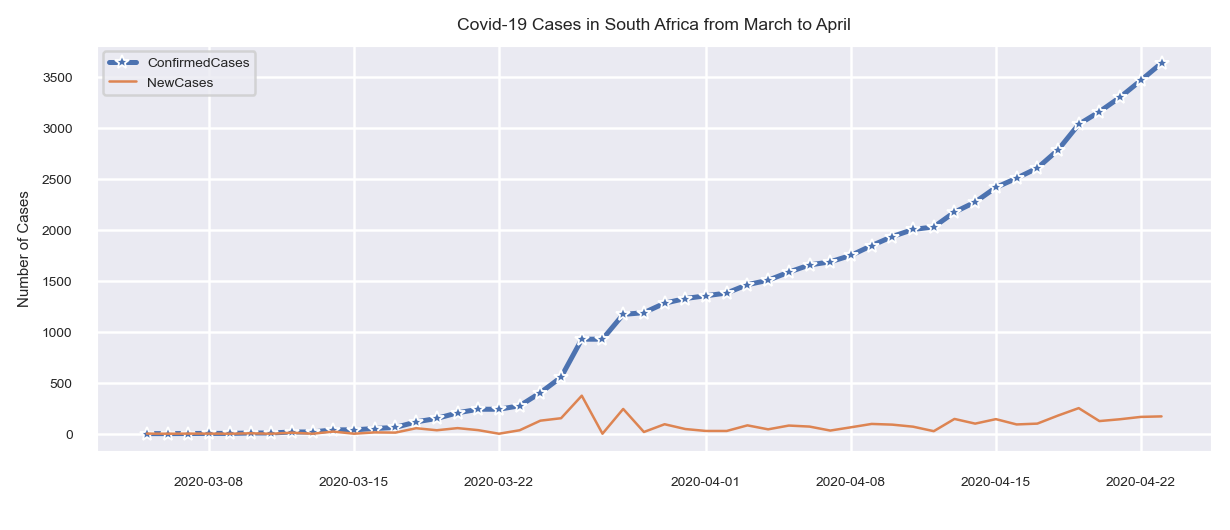

In [20]:
#Setting the figure size(width & height) and dpi is resolution.
plt.figure(figsize=(8,3),dpi=180)

#setting the style in the figure and it will be used as a default style for other charts unless is changed.          
sns.set_theme(style='darkgrid', font_scale=0.5)

#first plot 
sns.lineplot(data=SouthAfrica, x='Date',y='TotalCase',
             lw=2,marker='*',label="ConfirmedCases" )
#second plot
sns.lineplot(data=SouthAfrica,x='Date',y='NewCase',
             lw=1, label="NewCases" )

#change x,y labels.
plt.xlabel(" ")
plt.ylabel("Number of Cases")

#title of the chart
plt.title('Covid-19 Cases in South Africa from March to April',fontdict={'fontsize':7})
#save figure as png.
plt.savefig('Covid-19 Cases in SA in line graph.png', bbox_inches='tight')

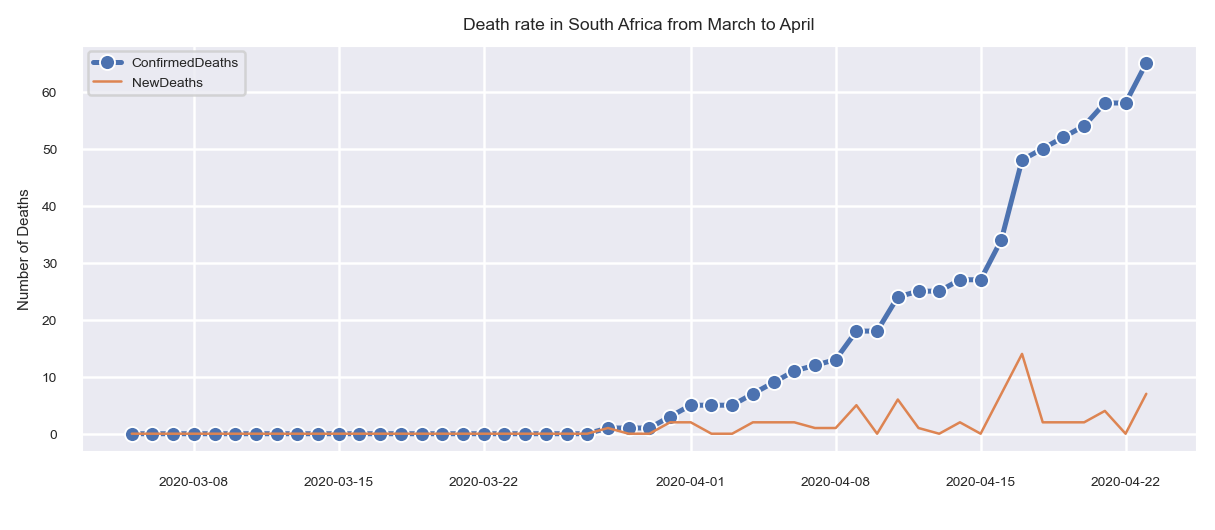

In [21]:
plt.figure(figsize=(8,3),dpi=180)

#first plot
sns.lineplot(data=SouthAfrica,x='Date',y='TotalDeath',
             lw=2,marker='o',label="ConfirmedDeaths")
#second plot
sns.lineplot(data=SouthAfrica,x='Date',y='NewDeath',
             lw=1,label="NewDeaths")

#change x,y labels.
plt.xlabel(" ")
plt.ylabel("Number of Deaths")

#Title of the chart
plt.title('Death rate in South Africa from March to April',fontdict={'fontsize':7})
#save figure
plt.savefig('Covid-19 death rate in SA in line graph.png')

In [22]:
#reminding myself of how the global data looked like but only taking 10% sample.

covid_data.sample(frac=0.1)

,ISO_CODE,COUNTRY_NAME,NewCase,TotalCase,NewDeath,TotalDeath
Date,,,,,,
2020-03-20,SVK,Slovakia,14,137,0,0
2020-03-20,GGY,Guernsey,0,1,0,0
2020-03-14,LKA,Sri Lanka,3,6,0,0
2020-02-05,PHL,Philippines,0,3,0,1
2020-04-04,PYF,French Polynesia,2,39,0,0
...,...,...,...,...,...,...
2020-03-29,ALB,Albania,15,212,1,10
2020-04-04,UGA,Uganda,3,48,0,0
2020-04-06,NCL,New Caledonia,0,18,0,0


## Summarized Global data

In [23]:
#Reducing number of rows
#Summing up the covid_data and group by country names and store in data_sum.

data_sum = covid_data.groupby(['COUNTRY_NAME'],axis=0,as_index=False).sum()
data_sum

,COUNTRY_NAME,NewCase,TotalCase,NewDeath,TotalDeath
0,Afghanistan,1176,15690,40,482
1,Albania,634,12431,26,591
2,Algeria,2910,46101,402,6047
3,Andorra,723,16348,37,638
4,Angola,24,417,2,47
...,...,...,...,...,...
208,Viet Nam,268,8663,0,0
209,Yemen,1,14,0,0
210,Zambia,74,1205,3,38
211,Zimbabwe,28,409,4,63


In [24]:
data_sum.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
NewCase,213.0,11784.868545,6.053476e+04,1.0,59.0,410.0,3197.0,800926.0
TotalCase,213.0,228223.183099,1.059048e+06,14.0,867.0,7534.0,52644.0,11967738.0
NewDeath,213.0,808.643192,4.010838e+03,0.0,1.0,9.0,74.0,40073.0
TotalDeath,213.0,13353.845070,6.479158e+04,0.0,20.0,139.0,1137.0,550743.0


In [25]:
#Looking for top 5 countries with highest number of Cases.
#Results stored in top5_cases.

top5_cases = data_sum.nlargest(5,'TotalCase')[['COUNTRY_NAME','TotalCase']]
top5_cases

,COUNTRY_NAME,TotalCase
204,United States of America,11967738
41,China,6073904
100,Italy,4606299
184,Spain,4280672
74,Germany,3148391


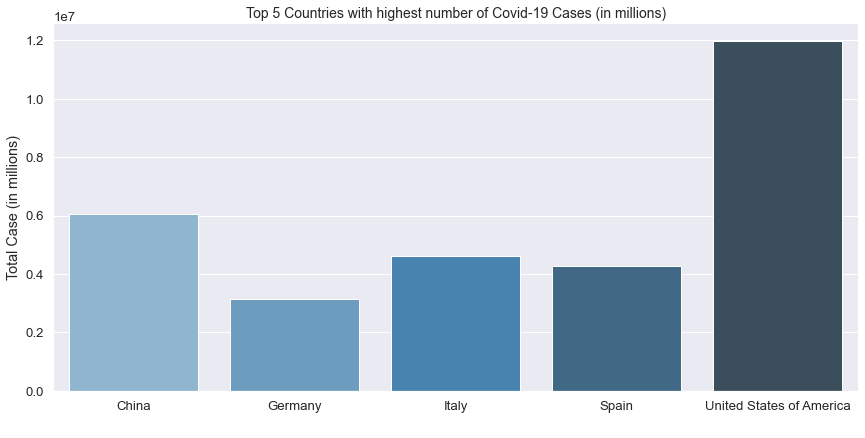

In [26]:
#Setting new themes for two charts below and their font scale
sns.set_theme(style='darkgrid', font_scale=1.2)

#barplot and sorted by country names in ascending order.
sns.catplot(data=top5_cases.sort_values('COUNTRY_NAME', ascending=True),
            x='COUNTRY_NAME',y='TotalCase',height=6,
            aspect=2, kind='bar', palette='Blues_d')

#x and y labels
plt.xlabel(" ")
plt.ylabel("Total Case (in millions)")

#Title of the chart
plt.title('Top 5 Countries with highest number of Covid-19 Cases (in millions)', size=14)
#save figure as png
plt.savefig('Covid-19 Cases in barplot.png')

In [27]:
#Looking for top 5 countries with highest number of covid-19 deaths.
#Store the result in top5_deaths.

top5_deaths = data_sum.nlargest(5,'TotalDeath')[['COUNTRY_NAME','TotalDeath']]
top5_deaths

,COUNTRY_NAME,TotalDeath
100,Italy,550743
204,United States of America,458568
184,Spain,409919
68,France,321474
192,The United Kingdom,231054


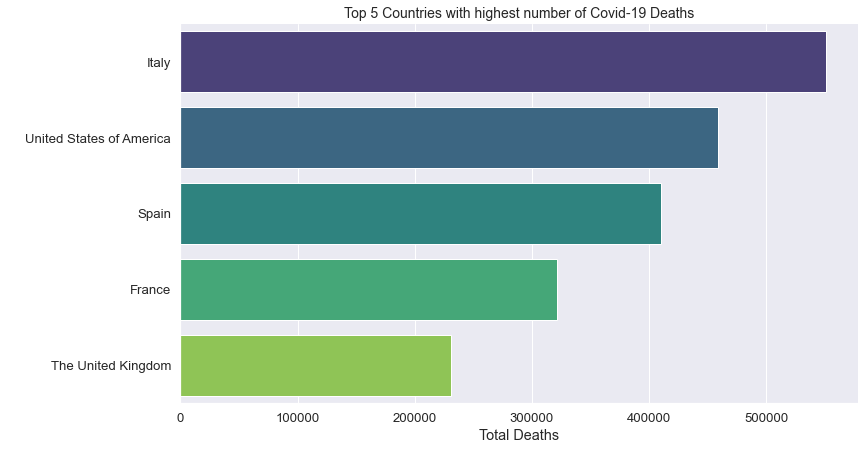

In [28]:
#horizontal barplot and sorted by TotalDeaths in descending order (default).
sns.catplot(data=top5_deaths,
            y='COUNTRY_NAME',x='TotalDeath',
            kind='bar',height=6, aspect=2,
            palette='viridis', orient='h')

#x and y labels
plt.ylabel(" ")
plt.xlabel("Total Deaths")

#Title of the chart
plt.title('Top 5 Countries with highest number of Covid-19 Deaths', size=14)
plt.savefig('Covid-19 Deaths on barh.png',bbox_inches='tight')

In [29]:
#Investigating countries with TotalDeath greater than 100K and consider as deadly countries.

deadly_countries = data_sum[data_sum.TotalDeath > 100000]
deadly_countries

,COUNTRY_NAME,NewCase,TotalCase,NewDeath,TotalDeath
41,China,84302,6073904,4642,230078
68,France,116151,2414664,20763,321474
95,Iran (Islamic Republic of),85996,2141676,5391,134987
100,Italy,183957,4606299,24648,550743
184,Spain,204178,4280672,21282,409919
192,The United Kingdom,129048,1937067,17337,231054
204,United States of America,800926,11967738,40073,458568


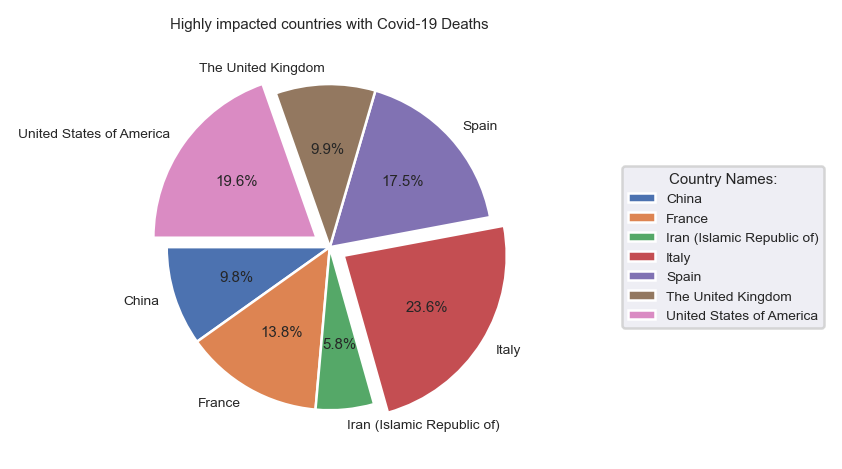

In [30]:
#setting figure size and resolution
plt.figure(figsize=(8,3), dpi=(180))
#set new font_scale again
sns.set(font_scale=0.5)

#plot the pie
plt.pie(data=deadly_countries,
        x=deadly_countries.TotalDeath,
        labels='COUNTRY_NAME',
        explode= (0,0,0,0.1,0,0,0.1),
        autopct= '%1.1f%%',
        shadow= False,
        startangle=180)

#add title
plt.title('Highly impacted countries with Covid-19 Deaths')

#adding legend
plt.legend(title='Country Names:',
           loc= 'center left',
           bbox_to_anchor=(1.2,0,0.5,1))
#save fig
plt.savefig('Highly impacted countries with Covid-19 Deaths in pie chart')

Spain and USA accounts for 43.2% of Covid-19 deaths from January to April in 2020, with just 4% difference.